In [2]:
# basic dependencies and useful math/organization
import pandas as pd
import numpy as np
import math
import random
from scipy.stats import chi2

# to read mzML files
from pyteomics import mzml

# to visualize MS/MS and obtain ground truth
import matplotlib.pyplot as plt
import seaborn as sns
from pyteomics import pylab_aux as pa
from pyteomics import mass

# to find peaks
from scipy.signal import find_peaks

In [3]:
mz_path = '../data/2015-05-19_MRC5_a.mzML'

In [20]:
MS1s = []
with mzml.MzML(mz_path) as reader:
    for spectrum in reader:
        # looking for the first match between the 2 files
        if spectrum["ms level"] == 1:
            MS1s.append(spectrum)

In [22]:
MS1s[1]

{'index': 8,
 'id': 'controllerType=0 controllerNumber=1 scan=9',
 'defaultArrayLength': 1519,
 'scanList': {'count': 1,
  'scan': [{'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 400.0 m/z,
       'scan window upper limit': 1800.0 m/z}]},
    'scan start time': 0.020997213 minute,
    'mass resolving power': 70000.0,
    'filter string': 'FTMS + p NSI Full ms [400.00-1800.00]',
    'preset scan configuration': 1.0,
    'ion injection time': 50.000000745058 millisecond}],
  'no combination': ''},
 'MS1 spectrum': '',
 'ms level': 1,
 'positive scan': '',
 'centroid spectrum': '',
 'base peak m/z': 445.123458 m/z,
 'base peak intensity': 271218.44 number of detector counts,
 'total ion current': 7570819.0,
 'lowest observed m/z': 400.295318603516 m/z,
 'highest observed m/z': 1609.194213867188 m/z,
 'spectrum title': '2015-05-19_MRC5_a.9.9. File:"2015-05-19_MRC5_a.raw", NativeID:"controllerType=0 controllerNumber=1 scan=9"',
 'count': 2,
 'm/z array': arr

In [7]:
mz_array = MS1['m/z array']
intensity_array = MS1['intensity array']
plotting_dict = {'m/z array': mz_array, 'intensity array': intensity_array}
# I am subtracting 1.00782 because that is the mass of the extra proton that

Text(0.5, 1.0, 'MS1 scan')

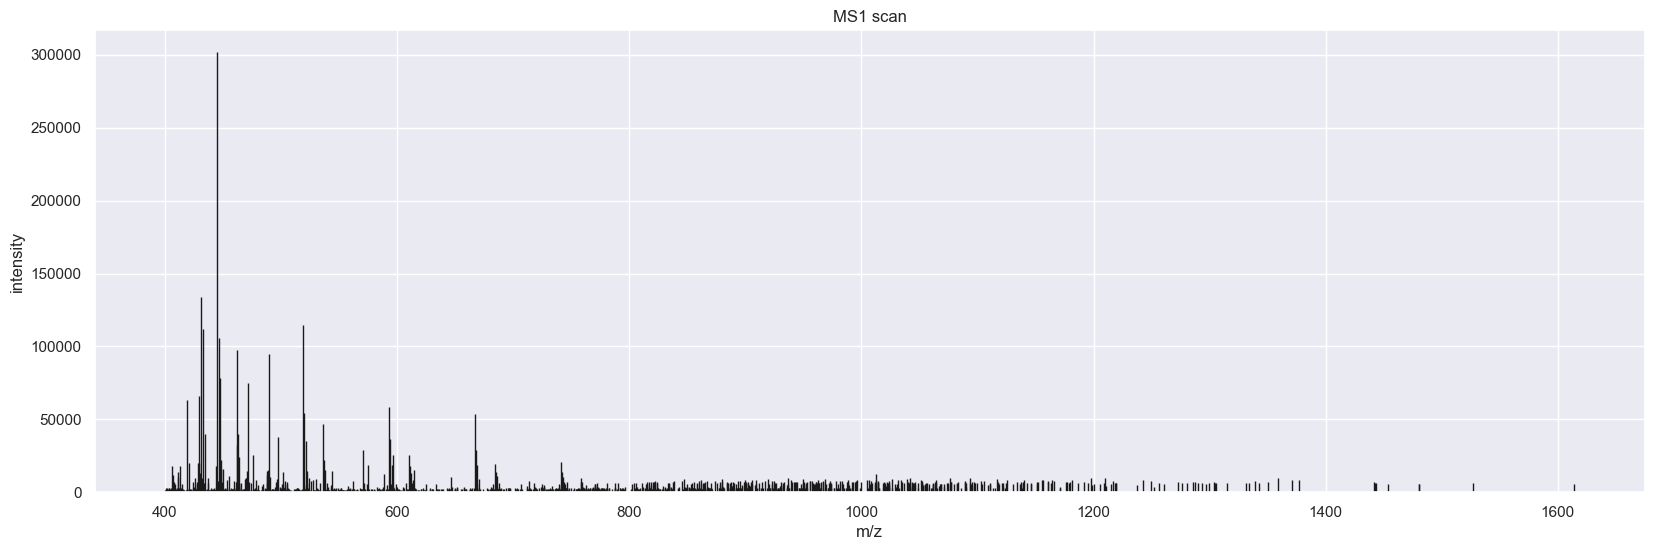

In [12]:
sns.set_theme(rc={'figure.figsize':(20,6)})
pa.plot_spectrum(plotting_dict).set_title("MS1 scan")